In [ ]:
def rule_fn(a, b, c):
    """Rule for updating Z matrix based on neighbors."""
    return 1 if (a + b + c) % 2 == 1 else 0

H, L = 8, 17
cols = H * L
rows = 2

Z = np.zeros((H, L), dtype=int)
Z[H-1, L//2] = 1

for i in range(H-rows, -1, -1):
    for j in range(L):
        a = Z[i+1, j-1] if j-1 >= 0 else Z[i+1, L-1]
        b = Z[i+1, j]
        c = Z[i+1, j+1] if j+1 < L else Z[i+1, 0]
            
        Z[i, j] = rule_fn(a, b, c)

weight = np.sum(Z)
print(f"Total weight of Z matrix: {weight}")

print("Z matrix: ")
print(Z)


Total weight of Z matrix: 40
Z matrix: 
[[0 1 1 0 1 1 0 1 1 1 0 1 1 0 1 1 0]
 [0 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0]
 [0 0 0 1 1 1 0 1 1 1 0 1 1 1 0 0 0]
 [0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]]


In [ ]:
H, L = 8, 17
cols = H * L
rows = 3

Z = np.zeros((H, L), dtype=int)
Z[H-1, L//2] = 1


for i in range(H-rows, -1, -1):
    for j in range(L):
        a = Z[i+2, j-1] if j-1 >= 0 else Z[i+2, L-1]
        b = Z[i+1, j]
        c = Z[i+2, j+1] if j+1 < L else Z[i+2, 0]
            
        Z[i, j] = rule_fn(a, b, c)

weight = np.sum(Z)
print(f"Total weight of Z matrix: {weight}")

print("Z matrix:")
print(Z)


Total weight of Z matrix: 17
Z matrix:
[[0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]]


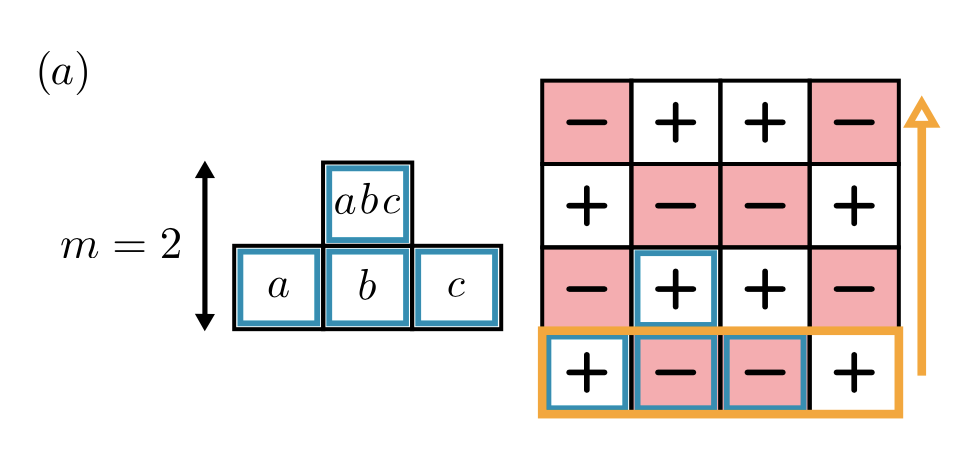

In [ ]:
import numpy as np

def fill_Z_with_stabilizer_shape(H, L, init_col, m, rule_fn):
    Z = np.zeros((H, L), dtype=int)
    Z[H - 1, init_col] = 1  # Single ∣i⟩ state at bottom

    for i in range(H - m, -1, -1):  # evolve upward
        for j in range(L):
            a = Z[i+1, j-1] if j-1 >= 0 else Z[i+1, L-1]
            b = Z[i+1, j]
            c = Z[i+1, j+1] if j+1 < L else Z[i+1, 0]
            Z[i, j] = rule_fn(a, b, c)

    return Z

def compute_kd_over_n(H, L, m, rule_fn):
    n = H * L
    k = (m - 1) * L

    d = H * L  # initialize large
    for shift in range(L):  # test all single-1 bottom row initializations
        Z = fill_Z_with_stabilizer_shape(H, L, shift, m, rule_fn)
        weight = np.sum(Z)
        if weight != 0:
            d = min(d, weight)

    kd_over_n = (k * d) / n
    return k, d, n, kd_over_n

H, L = 8, 17
rows = 2
def rule_fn(a, b, c):
    """Rule for updating Z matrix based on neighbors."""
    return 1 if (a + b + c) % 2 == 1 else 0

k, weight, cols, kd_over_n = compute_kd_over_n(H, L, rows, rule_fn)
print(f"n = {cols}, k = {k}, d = {weight}, kd/n = {kd_over_n:.2f}")


n = 136, k = 17, d = 40, kd/n = 5.00


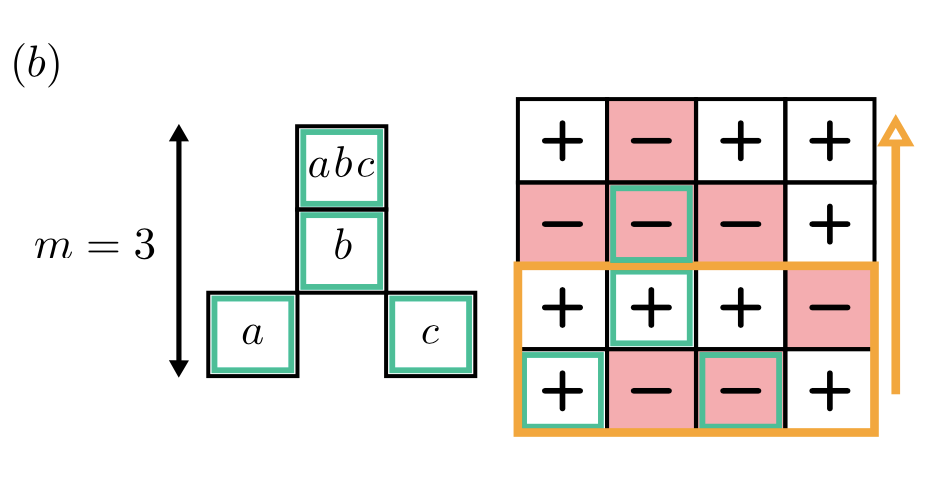

In [ ]:
import numpy as np

def fill_Z_with_stabilizer_shape(H, L, init_col, m, rule_fn):
    Z = np.zeros((H, L), dtype=int)
    Z[H - 1, init_col] = 1  # Single ∣i⟩ state at bottom

    for i in range(H - m, -1, -1):  # evolve upward
        for j in range(L):
            a = Z[i+2, j-1] if j-1 >= 0 else Z[i+2, L-1]
            b = Z[i+2, j]
            c = Z[i+2, j+1] if j+1 < L else Z[i+2, 0]
            Z[i, j] = rule_fn(a, b, c)

    return Z

def compute_kd_over_n(H, L, m, rule_fn):
    n = H * L
    k = (m - 1) * L

    d = H * L  # initialize large
    for shift in range(L):  # test all single-1 bottom row initializations
        Z = fill_Z_with_stabilizer_shape(H, L, shift, m, rule_fn)
        weight = np.sum(Z)
        if weight != 0:
            d = min(d, weight)

    kd_over_n = (k * d) / n
    return k, d, n, kd_over_n

H, L = 8, 17
rows = 3
def rule_fn(a, b, c):
    """Rule for updating Z matrix based on neighbors."""
    return 1 if (a + b + c) % 2 == 1 else 0

k, weight, cols, kd_over_n = compute_kd_over_n(H, L, rows, rule_fn)
print(f"n = {cols}, k = {k}, d = {weight}, kd/n = {kd_over_n:.2f}")


n = 136, k = 34, d = 12, kd/n = 3.00


In [ ]:
import numpy as np

def fill_Z_with_stabilizer_shape(input_row, H, L, m, condition_offsets):
    """Evolve the automaton from the input_row using given rule offsets."""
    Z = np.zeros((H - m + 1, L), dtype=int)
    Z = np.append(Z, input_row, axis=0)  # append input row at the bottom
    for i in range(H - m, -1, -1):  # evolve upward
        for j in range(L):
            neighbor_sum = 0
            for dx, dy in condition_offsets:
                neighbor_sum += Z[i + dx, (j + dy) % L]
            Z[i, j] = 1 if neighbor_sum % 2 == 1 else 0  # parity check

    return Z

def get_condition_indices(stabilizer_shape):
    """
    Extracts the list of relative positions (dx, dy) from a 3x3 binary rule matrix
    that define which neighbor cells contribute to the update rule.

    The (0, *) row is ignored (assumed to represent the current cell),
    and only rows 1 and 2 are used to define condition offsets.
    """
    rows, cols = stabilizer_shape.shape
    relative_positions = [[(0, 0), (0, 0), (0, 0)], # row 0 (ignored because it's result of input)
                   [(1, -1), (1, 0), (1, 1)], # row 1
                   [(2, -1), (2, 0), (2, 1)]] # row 2

    active_conditions = []               

    for i in range(1, rows):
        for j in range(cols):
            if stabilizer_shape[i][j] == 1:
                active_conditions.append(relative_positions[i][j])

    return active_conditions

def precompute_basis_outputs(H, L, m, condition_indices):
    """Precompute Z for each basis input (single 1 at position i)."""
    Z_basis = []

    for i in range(m-1):
        input_i = np.zeros((1, (m-1) * L), dtype=int)
        input_i = input_i.reshape(m - 1, L)
        input_i[i, 0] = 1
        Z_first = fill_Z_with_stabilizer_shape(input_i, H, L, m, condition_indices)
        Z_basis.append(Z_first)

        for j in range(1, L):
            Z_j = np.roll(Z_first, j, axis=1)
            Z_basis.append(Z_j)

    """Print the precomputed Z_basis for debugging"""
    # print(f"Precomputed Z_basis for H={H}, L={L}, m={m}:")
    # for idx, z in enumerate(Z_basis):
    #     print(f"Z_basis[{idx}] (index {idx}):\n{z}")

    return Z_basis

def evolve_via_basis(input_row, Z_basis):
    """Use linearity to compute Z for arbitrary input row."""
    result = np.zeros_like(Z_basis[0])
    indices = np.transpose(np.nonzero(input_row))
    for x, y in indices:
        idx = x * L + y  # compute index in Z_basis
        result = np.bitwise_xor(result, Z_basis[idx])
    return result

from itertools import product

def find_distance_via_basis(Z_basis, H, L, m):
    n = H * L
    k = (m - 1) * L
    min_weight = H * L  # initialize large
    kd_over_n = 0
    min_weight_input = None
    min_weight_output = None

    for bits in product([0, 1], repeat=(m-1) * L):
        input_row = np.array(bits, dtype=int)
        input_row = input_row.reshape(m-1, L)  # reshape for input row
        Z = evolve_via_basis(input_row, Z_basis)
        weight = np.sum(Z)
        if weight <= min_weight and weight > 0:  # only consider non-zero distances
            print(f"Fount Z with d={weight}: \n{Z}")
            min_weight_input = input_row
            min_weight_output = Z
            min_weight = weight  # update minimum distance

            kd_over_n = (k * min_weight) / n

            print(f"kd/n = {kd_over_n:.2f} with input: {min_weight_input}")
    return min_weight_input, min_weight_output, k, min_weight, n, kd_over_n
    
H, L = 8, 17
m = 3
# stabilizer_shapes = [
#     np.array([[0, 1, 0],
#               [1, 0, 0],
#               [1, 1, 0]]),
#     np.array([[0, 1, 0],
#               [1, 1, 0],
#               [0, 0, 1]])
# ]
stabilizer_shape = np.array([[0, 1, 0],
                      [0, 1, 0],
                      [1, 0, 1]])
print("Stabilizer shape:")
print(stabilizer_shape)
condition_indices = get_condition_indices(stabilizer_shape)

Z_basis = precompute_basis_outputs(H, L, m, condition_indices)

# input = np.zeros((1, (m-1) * L), dtype=int)
# input = input.reshape(m - 1, L)
# input[0, 3] = 1  # test single input at position 0
# input[1, 7] = 1  # test single input at position 1
# input[1, 12] = 1  # test single input at position 2
# print(f"Input for testing: \n{input}")
# Z_by_actual_computing = fill_Z_with_stabilizer_shape(input, H, L, m, condition_indices)
# Z_basis_output = evolve_via_basis(input, Z_basis)

# print("Z computed directly from input:")
# print(Z_by_actual_computing)
# print("Z computed via basis evolution:")
# print(Z_basis_output)

# print("is Z_by_actual_computing == Z_basis_output?")
# print(np.array_equal(Z_by_actual_computing, Z_basis_output))

min_weight_input, min_weight_output, k, d, n, kd_over_n = find_distance_via_basis(Z_basis, H, L, m)
print(f"input that has distance: {min_weight_input}, Z that has distance: \n{min_weight_output}, \nk: {k}, d: {d}, n: {n}, kd/n: {kd_over_n:.2f}")

Stabilizer shape:
[[0 1 0]
 [0 1 0]
 [1 0 1]]
Fount Z with d=17: 
[[0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]]
kd/n = 4.25 with input: [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]]
Fount Z with d=17: 
[[0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]]
kd/n = 4.25 with input: [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]]
Fount Z with d=17: 
[[1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 